In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cftime

In [4]:
file_dir = '/glade/u/home/marielj/clm_frost/preprocessing/forcings-modified/'

#import input data
forcings = xr.open_mfdataset(file_dir + '*.nc', parallel=True)

In [5]:
forcings

<xarray.Dataset>
Dimensions:     (time: 122640, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time        (time) object 2011-01-01 00:00:00 ... 2017-12-31 23:30:00
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/17)
    QBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    PRECTmms    (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ZBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FSDS        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FLDS        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    TBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ...          ...
    EDGEE       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    end_year    (time, scalar) int32 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEN       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    LATIXY      (time, lat) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGES       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEW       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>

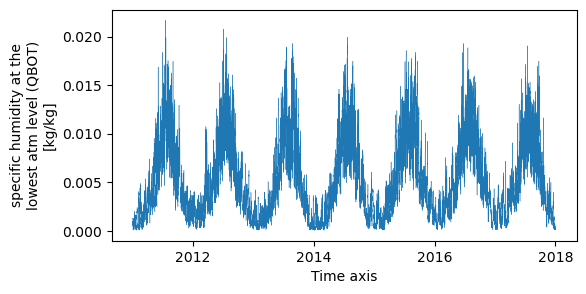

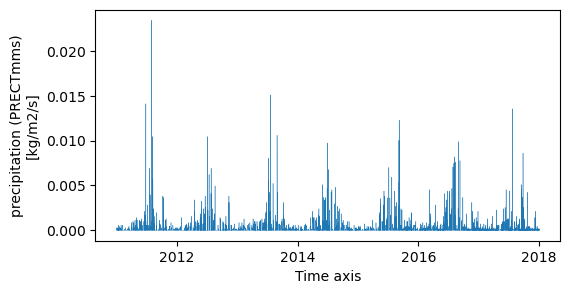

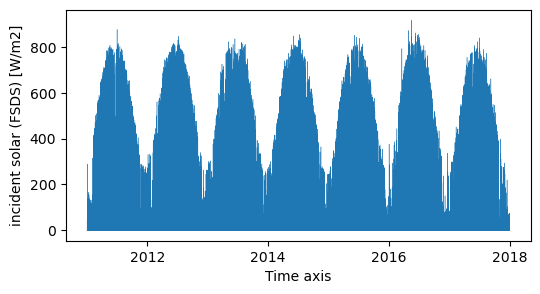

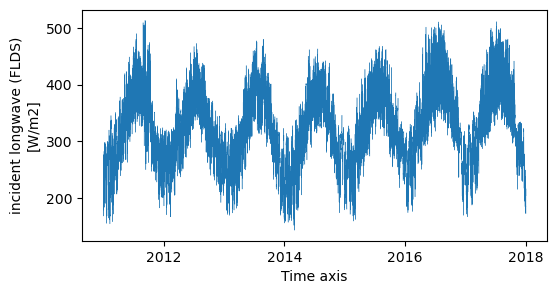

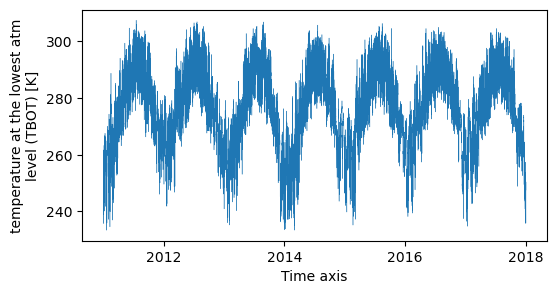

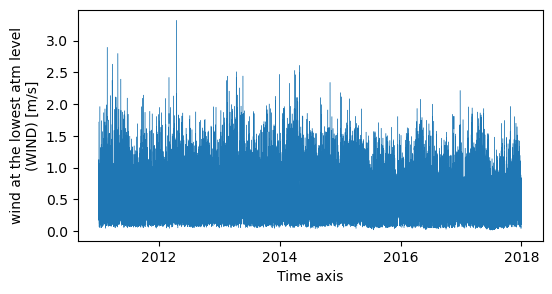

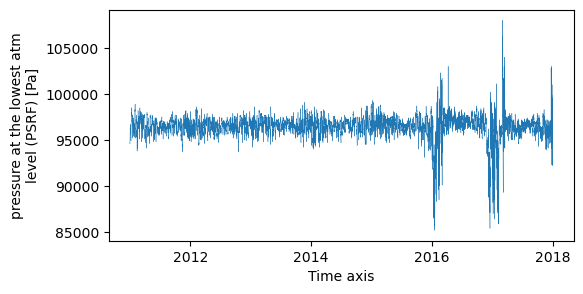

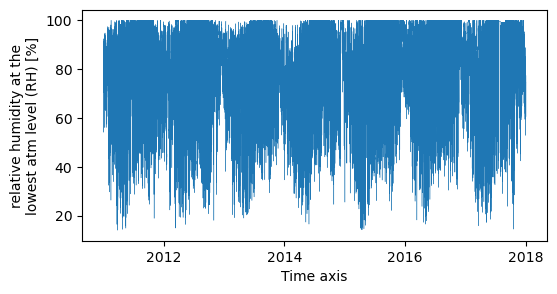

In [18]:
'''Plot Forcings'''

forcings.QBOT.plot(aspect=2, size=3, linewidth = 0.3)
forcings.PRECTmms.plot(aspect=2, size=3, linewidth = 0.3)
forcings.FSDS.plot(aspect=2, size=3, linewidth = 0.3)
forcings.FLDS.plot(aspect=2, size=3, linewidth = 0.3)
forcings.TBOT.plot(aspect=2, size=3, linewidth = 0.3)
forcings.WIND.plot(aspect=2, size=3, linewidth = 0.3)
forcings.PSRF.plot(aspect=2, size=3, linewidth = 0.3)
forcings.RH.plot(aspect=2, size=3, linewidth = 0.3)